In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft as sp ## scipy signal processor
from numpy import pi
import time

# Question 2
## part 1

In [2]:
signal = np.loadtxt("Signal.txt")
signal_length = len(signal)
sampling_time_duration = 2
sampling_frequency = signal_length/sampling_time_duration
t = np.arange(0, sampling_time_duration, 1/sampling_frequency)
nyquist_frequency = sampling_frequency/2
print("sampling frequency = ", sampling_frequency)
print("Nyquist frequency = ", nyquist_frequency)

sampling frequency =  1000.0
Nyquist frequency =  500.0


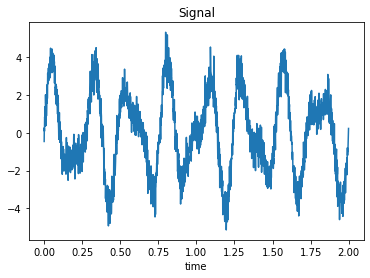

In [3]:
plt.plot(t, signal)
plt.title("Signal")
plt.xlabel("time")
plt.show()

## part 2
### A)

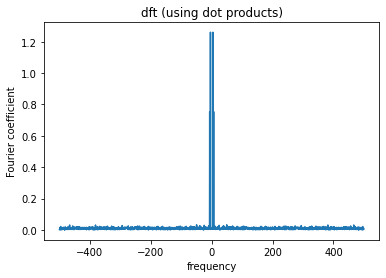

In [4]:
start_time = time.time_ns()
t_normalized = t / sampling_time_duration
dft = np.zeros(signal_length, dtype=np.complex_)
faundamental_angular_freq = complex(0,-2*pi)
for k in range(signal_length):
    complex_sine_wave = np.exp(faundamental_angular_freq * k * t_normalized)
    dft[k] = np.dot(signal, complex_sine_wave)

end_time = time.time_ns()
dft_execution_time = end_time - start_time
dft = np.roll(dft, int(signal_length/2))
freqs = np.linspace(-nyquist_frequency, nyquist_frequency, signal_length, endpoint=False)

plt.plot(freqs, np.abs(dft)/signal_length)
plt.title("dft (using dot products)")
plt.xlabel("frequency")
plt.ylabel("Fourier coefficient")
plt.show()

### B)

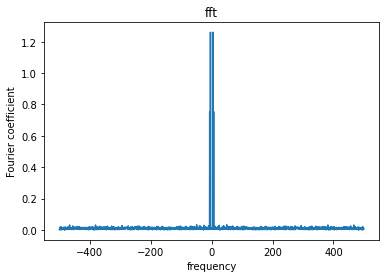

In [5]:
start_time = time.time_ns()
fft_ = sp.fftshift(sp.fft(signal))
freqs = sp.fftshift(sp.fftfreq(signal_length, 1/sampling_frequency))
end_time = time.time_ns()
fft_execution_time = end_time - start_time

plt.plot(freqs, np.abs(fft_)/signal_length)
plt.title("fft")
plt.xlabel("frequency")
plt.ylabel("Fourier coefficient")
plt.show()

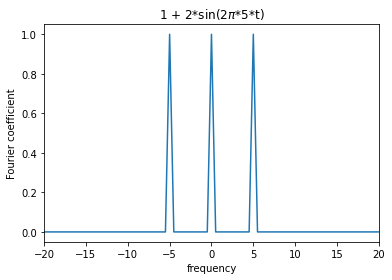

In [6]:
y = np.sin(pi/2) + 2*np.sin(2*pi*5*t)
dft_y = sp.fftshift(sp.fft(y))
plt.plot(freqs, np.abs(dft_y)/signal_length)
plt.xlim([-20, 20])
plt.title(r"1 + 2*sin(2$\pi$*5*t)")
plt.xlabel("frequency")
plt.ylabel("Fourier coefficient")
plt.show()

### C)

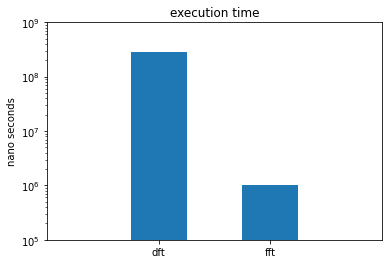

In [7]:
plt.bar([1, 2], [dft_execution_time, fft_execution_time], 0.5)
plt.yscale('log')
plt.ylim([10**5, 10**9])
plt.xticks([1, 2], ["dft", "fft"])
plt.xlim([0, 3])
plt.title("execution time")
plt.ylabel("nano seconds")
plt.show()

In [8]:
speed_up = dft_execution_time/fft_execution_time
print("fft speed-up = {:.0f}".format(speed_up))

fft speed-up = 284


# Question 3
### A)

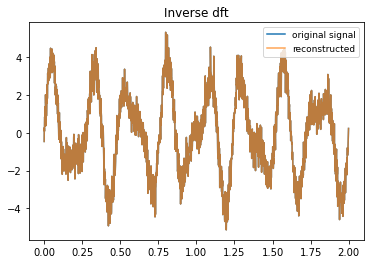

In [9]:
dft_unshift = np.roll(dft, -int(signal_length/2))
inverse_dft = np.zeros(signal_length, dtype=np.complex_)
ks = np.arange(0, signal_length)
for k in ks:
    complex_sine_wave = np.exp(-faundamental_angular_freq * ks * t_normalized[k])
    inverse_dft[k] = np.dot(dft_unshift, complex_sine_wave)

plt.plot(t, signal, label="original signal")
plt.plot(t, np.real(inverse_dft)/signal_length, alpha=0.7, label="reconstructed")
plt.legend(loc="upper right", prop={'size': 9})
plt.title("Inverse dft")
plt.show()

### B)

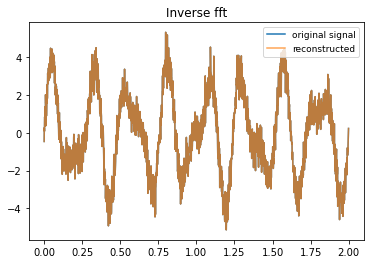

In [10]:
fft_unshift = sp.ifftshift(fft_)
inverse_fft = np.zeros(signal_length, dtype=np.complex_)
inverse_fft = sp.ifft(fft_unshift)

plt.plot(t, signal, label="original signal")
plt.plot(t, np.real(inverse_fft), alpha=0.7, label="reconstructed")
plt.legend(loc="upper right", prop={'size': 9})
plt.title("Inverse fft")
plt.show()

### C)

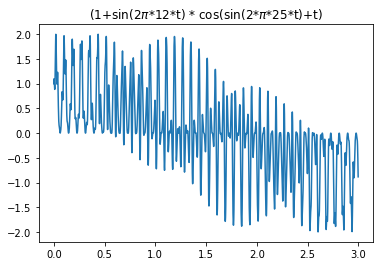

In [11]:
sampling_time_duration = 3
sampling_frequency = 1000
signal_length = sampling_time_duration * sampling_frequency
t = np.arange(0, sampling_time_duration, 1/sampling_frequency)
y = (1 + np.sin(2*pi*12*t)) * np.cos(np.sin(2*pi*25*t) + t)

plt.plot(t, y)
plt.title(r"(1+sin(2$\pi$*12*t) * cos(sin(2*$\pi$*25*t)+t)")
plt.show()

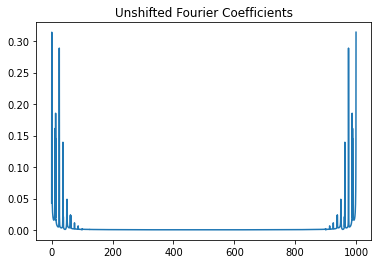

In [12]:
t_normalized = t / sampling_time_duration
dft_y = np.zeros(signal_length, dtype=np.complex_)
for k in range(signal_length):
    complex_sine_wave = np.exp(faundamental_angular_freq * k * t_normalized)
    dft_y[k] = np.dot(y, complex_sine_wave)

freqs = np.linspace(0, sampling_frequency, signal_length, endpoint=False)
plt.plot(freqs, np.abs(dft_y)/signal_length)
plt.title("Unshifted Fourier Coefficients")
plt.show()

python code for real-time animated reconstruction of original signal using its fourier coefficients is attached to the project (real-time.py)

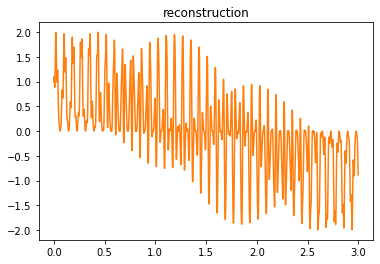

In [13]:
inverse_dft_y = np.zeros(signal_length, dtype=np.complex_)

for k in range(signal_length):
    complex_sine_wave = np.exp(-faundamental_angular_freq * k * t_normalized)
    inverse_dft_y += (complex_sine_wave * dft_y[k])/signal_length

plt.plot(t, np.real(inverse_dft_y), color="tab:orange")
plt.title("reconstruction")
plt.show()

### D)

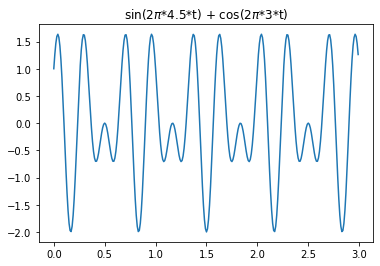

In [14]:
sampling_time_duration = 3
sampling_frequency = 100
signal_length = sampling_time_duration * sampling_frequency
t = np.arange(0, sampling_time_duration, 1/sampling_frequency)
y = np.sin(2*pi*4.5*t) + np.cos(2*pi*3*t)

plt.plot(t, y)
plt.title(r"sin(2$\pi$*4.5*t) + cos(2$\pi$*3*t)")
plt.show()

In [15]:
alphas = np.linspace(0, 10, 3)
dft_y = np.zeros((len(alphas), signal_length), dtype=np.complex_)
i = 0
for alpha in alphas:
    t_normalized = (t + alpha) / sampling_time_duration
    for k in range(signal_length):
        complex_sine_wave = np.exp(faundamental_angular_freq * k * t_normalized)
        dft_y[i][k] = np.dot(y, complex_sine_wave)
    i += 1

freqs = np.linspace(0, sampling_frequency, signal_length, endpoint=False)

In [16]:
inverse_dft_y = np.zeros((len(alphas), signal_length), dtype=np.complex_)
i = 0
for alpha in alphas:
    for k in range(signal_length):
        complex_sine_wave = np.exp(-faundamental_angular_freq * freqs[k] * t)
        inverse_dft_y[i] += (complex_sine_wave * dft_y[i][k])/signal_length
    i += 1

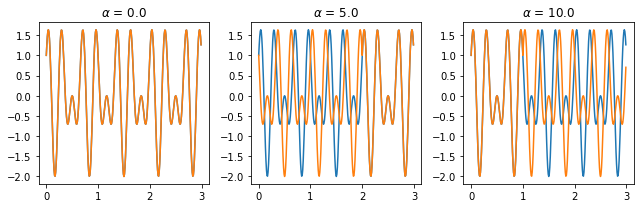

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
i = 0
for alpha in alphas:
    ax[i].plot(t, y)
    ax[i].plot(t, np.real(inverse_dft_y[i]))
    ax[i].set_title(r"$\alpha$ = {:.1f}".format(alpha))
    i += 1

fig.tight_layout()
plt.show()

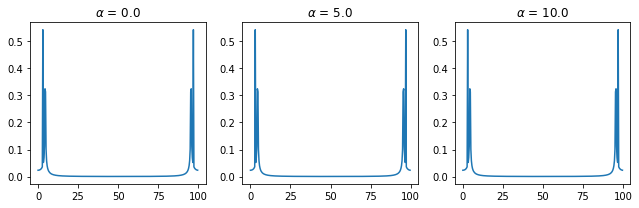

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
i = 0
for alpha in alphas:
    ax[i].plot(freqs, np.abs(dft_y[i])/signal_length)
    ax[i].set_title(r"$\alpha$ = {:.1f}".format(alpha))
    i += 1

fig.tight_layout()
plt.show()

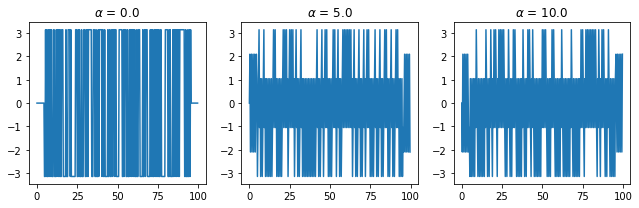

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
i = 0
for alpha in alphas:
    ax[i].plot(freqs, np.angle(dft_y[i]))
    ax[i].set_title(r"$\alpha$ = {:.1f}".format(alpha))
    i += 1

fig.tight_layout()
plt.show()

### E)

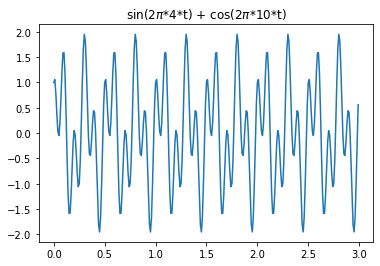

In [20]:
y = np.sin(2*pi*4*t) + np.cos(2*pi*10*t)
plt.plot(t, y)
plt.title(r"sin(2$\pi$*4*t) + cos(2$\pi$*10*t)")
plt.show()

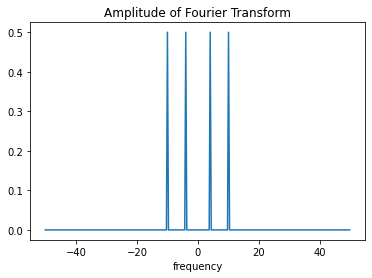

In [21]:
dft_y = sp.fft(y)
plt.plot(
    sp.fftshift(sp.fftfreq(signal_length, 1/sampling_frequency)),
    np.abs(sp.fftshift(dft_y))/signal_length
)
plt.title("Amplitude of Fourier Transform")
plt.xlabel("frequency")
plt.show()

In [22]:
index1 = sampling_time_duration * 4
index2 = signal_length - index1
dft_y[index1] = complex(0, 0)
dft_y[index2] = complex(0, 0)

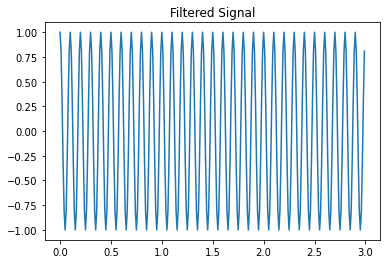

In [23]:
inverse_dft_y = sp.ifft(dft_y)
plt.plot(t, np.real(inverse_dft_y))
plt.title("Filtered Signal")
plt.show()